# Модель склонности клиента к покупке

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение" data-toc-modified-id="Введение-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение</a></span><ul class="toc-item"><li><span><a href="#Цель-исследования" data-toc-modified-id="Цель-исследования-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель исследования</a></span></li><li><span><a href="#План-исследования" data-toc-modified-id="План-исследования-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>План исследования</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Функции,-используемые-в-проекте" data-toc-modified-id="Функции,-используемые-в-проекте-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции, используемые в проекте</a></span></li><li><span><a href="#Анализ-исходных-данных" data-toc-modified-id="Анализ-исходных-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ исходных данных</a></span></li><li><span><a href="#Отбор-признаков" data-toc-modified-id="Отбор-признаков-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Отбор признаков</a></span></li><li><span><a href="#Построение-модели" data-toc-modified-id="Построение-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Построение модели</a></span><ul class="toc-item"><li><span><a href="#Загрузка-признаков" data-toc-modified-id="Загрузка-признаков-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Загрузка признаков</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Обучение-модели" data-toc-modified-id="Обучение-модели-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Обучение модели</a></span><ul class="toc-item"><li><span><a href="#LogisticRegression" data-toc-modified-id="LogisticRegression-5.3.1"><span class="toc-item-num">5.3.1&nbsp;&nbsp;</span><code>LogisticRegression</code></a></span></li><li><span><a href="#LigthGBMClassifier" data-toc-modified-id="LigthGBMClassifier-5.3.2"><span class="toc-item-num">5.3.2&nbsp;&nbsp;</span><code>LigthGBMClassifier</code></a></span></li><li><span><a href="#CatBoostClassifier" data-toc-modified-id="CatBoostClassifier-5.3.3"><span class="toc-item-num">5.3.3&nbsp;&nbsp;</span><code>CatBoostClassifier</code></a></span></li><li><span><a href="#XGB" data-toc-modified-id="XGB-5.3.4"><span class="toc-item-num">5.3.4&nbsp;&nbsp;</span><code>XGB</code></a></span></li></ul></li></ul></li><li><span><a href="#Тестирование" data-toc-modified-id="Тестирование-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Тестирование</a></span></li><li><span><a href="#Анализ-важности-признаков" data-toc-modified-id="Анализ-важности-признаков-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Анализ важности признаков</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Выводы</a></span></li></ul></div>

## Введение

### Цель исследования

Телекомуникационной компанией проедоставлены данные по клиентам, требуется разработать модель склонности (бинарной классификации) к покупке клиентом оборудования после коммуникации с ним в одном из каналов

### План исследования

1. Обзор и исследование данных
* анализ на пропуски, дубликаты, аномалии
* выявление зависимых признаков
* удаление явных аномалий

2. Подготовка данных
* отбор признаков для исследования
* заполнение пропусков
* генерация дополнительных признаков
* удаление неинформативных данных
* объединение данных
* разделение выборок на обучающию и валидационную

3. Построение моделей машинного обучение на основе алгоритмов
* Linear/Ridge
* LightGBM
* CatBoost

Обучение моделей с поиском оптимальных  гиперпараметров будем проводить с помощью GridSearchCV, использующий кросс-валидацию. 
Для оптимизации кода, и устранения проблемы утечки данных будем использоваться Pipeline

Выбор наилучшей по метрике модели

4. Тестирование выбранной модели. 
* формирование предсказаний
* выгрузка результатов тестирования
* загрузка предсказания на Kaggle
* оценка метрики на тесте на публичной выборке

5. Поиск точек роста метрики и повторение пп.2-4

6. Оформление результатов исследовния.

### Описание данных




Заказчиком предоставлены файлы:

* `dataset_train.parquet` - тренировочный датасет;
* `features_oot.parquet` - тестовый датасет;
* `features_types.json` - описание типов признаков;
* `sample_submission.csv` - пример файла с загружаемыми результатами;

**Признаки**

Для каждой пары `'id' + 'period'` собрано более 2500 признаков

Названия признаков интерпретируются следующим образом:
```
`<модуль><номер признака><глубина агрегации>_<тип>`
```

Если признак построен как агрегат (например сумма за период), то указывается `<глубина агрегации>` в месяцах, в противном случае ставится 0. Также, в качестве `<глубина агрегации>` может быть запись вида `'3d6'`, что указывает на отношение агрегата за 3 месяца к агрегату за 6 месяцев. 


Различные типы признаков (`<тип>`) описаны ниже:

* `flg` - флаг (значение 1 или 0)
* `ctg` - категориальный признак
* `num` - числовой признак
* `dt` - дата
* `cnt` -количество
* `sum` -сумма
* `avg` - среднее
* `sumpct` -персентиль по сумме
* `part` - доля

В файле `features_types.json` дополнительно записан словарь, где для каждой фичи в соответствие ставится
тип из списка (`numeric, categorical_int, categorical_string`)

Импортируем библиотеки

In [142]:
import pandas as pd
import numpy as np

#загрузка данных
import joblib
import pyarrow as pa
from pyarrow import json
from pyarrow.parquet import ParquetFile

# графика
import seaborn as sns
import matplotlib.pyplot as plt

# модели
from catboost import CatBoostClassifier, Pool
from lightgbm import LGBMClassifier

from sklearn.metrics import roc_auc_score
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import (train_test_split,
                                     GridSearchCV)
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import (RobustScaler, 
                                   StandardScaler, 
                                   MaxAbsScaler, 
                                   MinMaxScaler)
import warnings

In [2]:
# настроим отображение чисел и таблиц
pd.set_option('display.float_format', '{:.4f}'.format)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 200)
pd.set_option('display.width', 500)

In [3]:
# зафиксируем псевдослучайность
RS = 5962
# количество фолдов для кросс-валидации
CV = 3

In [4]:
# сохраним путь для лиректории с файлами
folder_path = './'

## Функции, используемые в проекте

In [5]:
def data_info(data_name):
    '''функция выводит информацию о данных'''

    print('\n\nДанные из выборки\n')
    display(data_name.head(5))
    display(data_name.tail(5))

    print(f'\n\nКоличество признаков: {data_name.shape[1]}, Количество наблюдений: {data_name.shape[0]}\n')

    print('\nИнформация о данных\n')
    info_list = []
    for item in data_name.columns:
        info_list.append({
            'Признак': item,
            'Тип данных': data_name.dtypes[item],
            'Уникальных значений': data_name[item].nunique(),
            '%Пропусков': data_name[item].isna().mean()*100
        })
    display(pd.DataFrame(info_list).style.bar(subset=['%Пропусков']))


    print(f'\n\nКоличество полных дубликатов в данных: {data_name.duplicated().sum()}')

    print('\n\nОписательная статистика ')
    display(data_name.describe().T)

In [6]:
def data_load(list_to_load, base_list=True):
    '''функция датасета с выбранными столбцами'''
    gen_list = ['channel_name', 'target']

    if base_list:
        gen_list =['id', 'period', 'channel_name', 'target']
        
    file_name = 'dataset_train'
    file_path = folder_path +'/'+ file_name + '.parquet'
    data = pd.read_parquet(file_path,
                       engine='auto',
                       columns=(gen_list + list_to_load))    
    return data

In [7]:
def data_to_model(data, test_size=0.2):
    '''функция подготовки данных для дальнейшего использования в модели
    на входе: датасет
    на выходе: обучающие и тестовые выборки'''
    # удаление полных дубликатов
    data = data.drop_duplicates(keep='last')
    X =  data.drop(['id', 'target'], axis=1)
    y = data['target']
    return X, y

In [8]:
def feature_impotant_selection(data, params={}):
    '''функция построения базовой модели и вывода информации о важности фичей
    на входе: датасет с данными
    на выходе: датасет с важностью фичей'''

    X_train, y_train = data_to_model(data)

    pipe_cat = Pipeline(steps=[
         ('impute', SimpleImputer(fill_value=-10)),
         ('model', CatBoostClassifier(random_state=RS, verbose=False))])

    searcher = GridSearchCV(pipe_cat,
                            param_grid=params,
                            scoring='roc_auc',
                            cv=2,
                            n_jobs=-1,
                            verbose=10)

    search = searcher.fit(X_train, y_train)
    features_importances_cb = pd.DataFrame(search.best_estimator_[-1].get_feature_importance(), X_train.columns)\
                                    .reset_index()\
                                    .rename(columns={'index' : 'feature_name', 0: 'importance'})\
                                    .sort_values(by='importance', ascending=False)
    
    # построим график важности признаков
    plt.figure(figsize=(10,10));
    sns.barplot(x='importance', y='feature_name', data=features_importances_cb);
    plt.grid(True);
    plt.xlabel('важность')
    plt.ylabel('наименование признаков')
    plt.title('Важность признаков');
    
    best_features.append(features_importances_cb.feature_name.values.tolist())   

    fi = pd.concat([features_impotance, features_importances_cb])
    return fi

In [9]:
def box_hist_plot(data, columns, bins=20, kde=True):
    '''визуализация распределения'''
    sns.set(style="whitegrid", palette="Spectral")

    # построим полученное распределение
    f, (ax_box, ax_hist) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize = (10,4))
    f.suptitle(f'Распределение признака {columns}')
    
    sns.histplot(data=data, x=columns, ax=ax_hist, bins=bins, kde=kde)    
    # ящик с усами
    sns.boxplot(data=data, x=columns, ax=ax_box)
    
    # построим границы доверительного интервала
    ymin, ymax = ax_hist.get_ylim()
    x_lower = data[columns].quantile(0.25)
    x_upper = data[columns].quantile(0.75)
    ax_hist.vlines(x=[x_lower, x_upper], ymin=ymin, ymax=ymax, ls='--')

    plt.show()

In [10]:
def select_model(model, params, 
                 features, target, 
                 num_features=None, cat_features=None, 
                 features_most_frequent=None, features_flag=None, 
                 model_type='UNK', preproc=False):
    '''функция подбора гиперпараметров для заданной модели
    на входе: модель, параметры для подбора, фичи и таргет,
              категориальные признаки, числовые признаки,
              способ подбора параметров, по умолчанию GridSearchCV
    на выходе: подобранная модель и значение искомой метрики ROC_AUC'''
    
    if preproc:
        preprocessor = ColumnTransformer([
            ('num_median', SimpleImputer(strategy='median'), num_features),
            ('num_most_frequent', SimpleImputer(strategy='most_frequent'), features_most_frequent),
            ('category', SimpleImputer(fill_value=-1), cat_features)
        ])
    
        # собираем пайплайн    
        pipe = Pipeline(steps=[
            ('preprocessor', SimpleImputer(fill_value=-1)),
            ('model', model)])  
    else:
        # собираем пайплайн    
        pipe = Pipeline(steps=[
            ('preprocessor', SimpleImputer(fill_value=-3)),
            ('scaler', RobustScaler(quantile_range=(1, 99))),
            ('model', model)]) 

    # подбор гиперпараметров
    searcher = GridSearchCV(pipe,
                            param_grid=params,
                            scoring='roc_auc',
                            cv=CV,
                            n_jobs=-1,
                            verbose=10)
   
    time_start = dt.now()
    search = searcher.fit(features, target)
    time_search = (dt.now() - time_start)
    
    # вычисляем время работы с лучшими параметрами
    pipe.set_params(**search.best_params_)
    
    time_start = dt.now()
    pipe.fit(features, target)
    time_fit = (dt.now() - time_start)
    
    time_start = dt.now()
    pipe.predict(features)
    time_predict = (dt.now() - time_start)
    
    list_best_params.append({'model_type': model_type,
                             'model': search.best_estimator_[-1],
                             'model_params': search.best_params_,
                             'ROC_AUC': search.best_score_,
                             'time_search': time_search,
                             'time_fit': time_fit,
                             'time_predict': time_predict})

In [144]:
def fitting(X_train,  y_train,  params, fit_params):
    '''
    Функция для обучения модели CatBoostCLS
    на входе:
        X_train - обучающая выборка
        y_train - целевой признак для обучающей выборки
        params - параметры модели
        fit_params - параметры обучения
     на выходе: 
        модель, метрика данные о важности фичей для модели 
     '''
    cbc = CatBoostClassifier(**params)
    cbc.fit(X_train, y_train, **fit_params)

    predictions = cbc.predict_proba(X_valid)
    auc = roc_auc_score(y_valid, predictions[:, 1])

    fi = pd.DataFrame({'feature_names': cbc.feature_names_, 
                       'importance': cbc.feature_importances_})

    return cbc, auc, fi.sort_values(by = 'importance', ascending=False)

In [11]:
def print_result(list_for_print, count=10):
    '''выводим таблицу с данными'''
    # табличка с оптимизированными гиперпараметрами
    df_selection_models = pd.DataFrame(list_for_print)
    display(df_selection_models.head(count))

## Анализ исходных данных

In [12]:
# Изучение описательных данных
df_features = json.read_json('features_types.json').to_pandas()
df_features = df_features.transpose().reset_index().rename(columns={'index': 'name', 0: 'type'})

In [13]:
df_features.pivot_table(index='type', aggfunc={'count'})

,name
,count
type,
categorical_int,138
categorical_str,31
numeric,2607


Посмотрим глазиком на весь датасет на маленькой выборке

In [14]:
pf = ParquetFile('dataset_train.parquet')
first_100_rows = next(pf.iter_batches(batch_size = 100))
df = pa.Table.from_batches([first_100_rows]).to_pandas()

In [15]:
data_info(df)



Данные из выборки



,id,period,channel_name,target,markers_0_1_cnt,markers_1_1_cnt,markers_2_1_cnt,markers_3_1_cnt,markers_4_1_cnt,markers_5_1_cnt,markers_6_1_cnt,markers_7_1_cnt,markers_8_1_cnt,markers_9_1_cnt,markers_10_1_cnt,markers_11_1_cnt,markers_12_1_cnt,markers_13_1_cnt,markers_14_1_cnt,markers_15_1_cnt,markers_16_1_cnt,markers_17_1_cnt,markers_18_1_cnt,markers_19_1_cnt,markers_20_1_cnt,markers_21_1_cnt,markers_22_1_cnt,markers_23_1_cnt,markers_24_1_cnt,markers_25_1_cnt,markers_26_1_cnt,markers_27_1_cnt,markers_28_1_cnt,markers_29_1_cnt,markers_30_1_cnt,markers_31_1_cnt,markers_32_1_cnt,markers_33_1_cnt,markers_34_1_cnt,markers_35_1_cnt,markers_36_1_cnt,markers_37_1_cnt,markers_38_1_cnt,markers_39_1_cnt,markers_40_1_cnt,markers_41_1_cnt,markers_42_1_cnt,markers_43_1_cnt,markers_44_1_cnt,markers_45_1_cnt,markers_46_1_cnt,markers_47_1_cnt,markers_48_1_cnt,markers_49_1_cnt,markers_50_1_cnt,markers_51_1_cnt,markers_52_1_cnt,markers_53_1_cnt,markers_54_1_cnt,markers_55_1_cnt,markers_56_1_cnt,markers_57_1_cnt,markers_58_1_cnt,markers_59_1_cnt,markers_60_1_cnt,markers_61_1_cnt,markers_62_1_cnt,markers_63_1_cnt,markers_64_1_cnt,markers_65_1_cnt,markers_66_1_cnt,markers_67_1_cnt,markers_68_1_cnt,markers_69_1_cnt,markers_70_1_cnt,markers_71_1_cnt,markers_72_1_cnt,markers_73_1_cnt,markers_74_1_cnt,markers_75_1_cnt,markers_76_1_cnt,markers_77_1_cnt,markers_78_1_cnt,markers_79_1_cnt,markers_80_1_cnt,markers_81_1_cnt,markers_82_1_cnt,markers_83_1_cnt,markers_84_1_cnt,markers_85_1_cnt,markers_86_1_cnt,markers_87_1_cnt,markers_88_1_cnt,markers_89_1_cnt,markers_90_1_cnt,markers_91_1_cnt,markers_92_1_cnt,markers_93_1_cnt,markers_94_1_cnt,markers_95_1_cnt,markers_96_1_cnt,markers_97_1_cnt,markers_98_1_cnt,markers_99_1_cnt,markers_100_1_cnt,markers_101_1_cnt,markers_102_1_cnt,markers_103_1_cnt,markers_104_1_cnt,markers_105_1_cnt,markers_106_1_cnt,markers_107_1_cnt,markers_108_1_cnt,markers_109_1_cnt,markers_110_1_cnt,markers_111_1_cnt,markers_112_1_cnt,markers_113_1_cnt,markers_114_1_cnt,markers_115_1_cnt,markers_116_1_cnt,markers_117_1_cnt,markers_118_1_cnt,markers_119_1_cnt,markers_120_1_cnt,markers_121_1_cnt,markers_122_1_cnt,markers_123_1_cnt,markers_124_1_cnt,markers_125_1_cnt,markers_126_1_cnt,markers_128_1_cnt,markers_129_1_cnt,markers_131_1_cnt,markers_132_1_cnt,markers_133_1_cnt,markers_135_1_cnt,markers_136_1_cnt,markers_137_1_cnt,markers_138_1_cnt,markers_139_1_cnt,markers_140_1_cnt,markers_141_1_cnt,markers_142_1_cnt,markers_143_1_cnt,markers_145_1_cnt,markers_146_1_cnt,markers_147_1_cnt,markers_148_1_cnt,markers_149_1_cnt,markers_150_1_cnt,markers_151_1_cnt,markers_154_1_cnt,markers_155_1_cnt,markers_156_1_cnt,markers_157_1_cnt,markers_158_1_cnt,markers_159_1_cnt,markers_160_1_cnt,markers_161_1_cnt,markers_162_1_cnt,markers_163_1_cnt,markers_164_1_cnt,markers_165_1_cnt,markers_166_1_cnt,markers_167_1_cnt,markers_168_1_cnt,markers_169_1_cnt,markers_170_1_cnt,markers_171_1_cnt,markers_172_1_cnt,markers_173_1_cnt,markers_174_1_cnt,markers_175_1_cnt,markers_176_1_cnt,markers_177_1_cnt,markers_178_1_cnt,markers_179_1_cnt,markers_180_1_cnt,markers_181_1_cnt,markers_182_1_cnt,markers_183_1_cnt,markers_184_1_cnt,markers_185_1_cnt,markers_186_1_cnt,markers_187_1_cnt,markers_188_1_cnt,markers_189_1_cnt,markers_190_1_cnt,markers_191_1_cnt,markers_192_1_cnt,markers_193_1_cnt,markers_194_1_cnt,markers_195_1_cnt,markers_196_1_cnt,markers_198_1_cnt,markers_199_1_cnt,markers_201_1_cnt,markers_202_1_cnt,markers_203_1_cnt,markers_204_1_cnt,markers_205_1_cnt,markers_206_1_cnt,markers_207_1_cnt,markers_208_1_cnt,markers_209_1_cnt,markers_210_1_cnt,markers_211_1_cnt,markers_212_1_cnt,markers_213_1_cnt,markers_215_1_cnt,markers_216_1_cnt,markers_217_1_cnt,markers_218_1_cnt,markers_219_1_cnt,markers_220_1_cnt,markers_221_1_cnt,markers_222_1_cnt,markers_223_1_cnt,markers_224_1_cnt,markers_225_1_cnt,markers_226_1_cnt,markers_227_1_cnt,markers_228_1_cnt,markers_229_1_cnt,markers_230_1_cnt,markers_231_1_cnt,markers_232_1_cnt,markers_233_1_cnt,markers_234_1_cnt,markers_235

,id,period,channel_name,target,markers_0_1_cnt,markers_1_1_cnt,markers_2_1_cnt,markers_3_1_cnt,markers_4_1_cnt,markers_5_1_cnt,markers_6_1_cnt,markers_7_1_cnt,markers_8_1_cnt,markers_9_1_cnt,markers_10_1_cnt,markers_11_1_cnt,markers_12_1_cnt,markers_13_1_cnt,markers_14_1_cnt,markers_15_1_cnt,markers_16_1_cnt,markers_17_1_cnt,markers_18_1_cnt,markers_19_1_cnt,markers_20_1_cnt,markers_21_1_cnt,markers_22_1_cnt,markers_23_1_cnt,markers_24_1_cnt,markers_25_1_cnt,markers_26_1_cnt,markers_27_1_cnt,markers_28_1_cnt,markers_29_1_cnt,markers_30_1_cnt,markers_31_1_cnt,markers_32_1_cnt,markers_33_1_cnt,markers_34_1_cnt,markers_35_1_cnt,markers_36_1_cnt,markers_37_1_cnt,markers_38_1_cnt,markers_39_1_cnt,markers_40_1_cnt,markers_41_1_cnt,markers_42_1_cnt,markers_43_1_cnt,markers_44_1_cnt,markers_45_1_cnt,markers_46_1_cnt,markers_47_1_cnt,markers_48_1_cnt,markers_49_1_cnt,markers_50_1_cnt,markers_51_1_cnt,markers_52_1_cnt,markers_53_1_cnt,markers_54_1_cnt,markers_55_1_cnt,markers_56_1_cnt,markers_57_1_cnt,markers_58_1_cnt,markers_59_1_cnt,markers_60_1_cnt,markers_61_1_cnt,markers_62_1_cnt,markers_63_1_cnt,markers_64_1_cnt,markers_65_1_cnt,markers_66_1_cnt,markers_67_1_cnt,markers_68_1_cnt,markers_69_1_cnt,markers_70_1_cnt,markers_71_1_cnt,markers_72_1_cnt,markers_73_1_cnt,markers_74_1_cnt,markers_75_1_cnt,markers_76_1_cnt,markers_77_1_cnt,markers_78_1_cnt,markers_79_1_cnt,markers_80_1_cnt,markers_81_1_cnt,markers_82_1_cnt,markers_83_1_cnt,markers_84_1_cnt,markers_85_1_cnt,markers_86_1_cnt,markers_87_1_cnt,markers_88_1_cnt,markers_89_1_cnt,markers_90_1_cnt,markers_91_1_cnt,markers_92_1_cnt,markers_93_1_cnt,markers_94_1_cnt,markers_95_1_cnt,markers_96_1_cnt,markers_97_1_cnt,markers_98_1_cnt,markers_99_1_cnt,markers_100_1_cnt,markers_101_1_cnt,markers_102_1_cnt,markers_103_1_cnt,markers_104_1_cnt,markers_105_1_cnt,markers_106_1_cnt,markers_107_1_cnt,markers_108_1_cnt,markers_109_1_cnt,markers_110_1_cnt,markers_111_1_cnt,markers_112_1_cnt,markers_113_1_cnt,markers_114_1_cnt,markers_115_1_cnt,markers_116_1_cnt,markers_117_1_cnt,markers_118_1_cnt,markers_119_1_cnt,markers_120_1_cnt,markers_121_1_cnt,markers_122_1_cnt,markers_123_1_cnt,markers_124_1_cnt,markers_125_1_cnt,markers_126_1_cnt,markers_128_1_cnt,markers_129_1_cnt,markers_131_1_cnt,markers_132_1_cnt,markers_133_1_cnt,markers_135_1_cnt,markers_136_1_cnt,markers_137_1_cnt,markers_138_1_cnt,markers_139_1_cnt,markers_140_1_cnt,markers_141_1_cnt,markers_142_1_cnt,markers_143_1_cnt,markers_145_1_cnt,markers_146_1_cnt,markers_147_1_cnt,markers_148_1_cnt,markers_149_1_cnt,markers_150_1_cnt,markers_151_1_cnt,markers_154_1_cnt,markers_155_1_cnt,markers_156_1_cnt,markers_157_1_cnt,markers_158_1_cnt,markers_159_1_cnt,markers_160_1_cnt,markers_161_1_cnt,markers_162_1_cnt,markers_163_1_cnt,markers_164_1_cnt,markers_165_1_cnt,markers_166_1_cnt,markers_167_1_cnt,markers_168_1_cnt,markers_169_1_cnt,markers_170_1_cnt,markers_171_1_cnt,markers_172_1_cnt,markers_173_1_cnt,markers_174_1_cnt,markers_175_1_cnt,markers_176_1_cnt,markers_177_1_cnt,markers_178_1_cnt,markers_179_1_cnt,markers_180_1_cnt,markers_181_1_cnt,markers_182_1_cnt,markers_183_1_cnt,markers_184_1_cnt,markers_185_1_cnt,markers_186_1_cnt,markers_187_1_cnt,markers_188_1_cnt,markers_189_1_cnt,markers_190_1_cnt,markers_191_1_cnt,markers_192_1_cnt,markers_193_1_cnt,markers_194_1_cnt,markers_195_1_cnt,markers_196_1_cnt,markers_198_1_cnt,markers_199_1_cnt,markers_201_1_cnt,markers_202_1_cnt,markers_203_1_cnt,markers_204_1_cnt,markers_205_1_cnt,markers_206_1_cnt,markers_207_1_cnt,markers_208_1_cnt,markers_209_1_cnt,markers_210_1_cnt,markers_211_1_cnt,markers_212_1_cnt,markers_213_1_cnt,markers_215_1_cnt,markers_216_1_cnt,markers_217_1_cnt,markers_218_1_cnt,markers_219_1_cnt,markers_220_1_cnt,markers_221_1_cnt,markers_222_1_cnt,markers_223_1_cnt,markers_224_1_cnt,markers_225_1_cnt,markers_226_1_cnt,markers_227_1_cnt,markers_228_1_cnt,markers_229_1_cnt,markers_230_1_cnt,markers_231_1_cnt,markers_232_1_cnt,markers_233_1_cnt,markers_234_1_cnt,markers_235



Количество признаков: 2780, Количество наблюдений: 100


Информация о данных



,Признак,Тип данных,Уникальных значений,%Пропусков
0,id,object,69,0.000000
1,period,int32,12,0.000000
2,channel_name,object,5,0.000000
3,target,int32,2,0.000000
4,markers_0_1_cnt,float64,2,6.000000
5,markers_1_1_cnt,float64,3,6.000000
6,markers_2_1_cnt,float64,15,6.000000
7,markers_3_1_cnt,float64,8,6.000000
8,markers_4_1_cnt,float64,25,6.000000
9,markers_5_1_cnt,float64,10,6.000000




Количество полных дубликатов в данных: 0


Описательная статистика 


,count,mean,std,min,25%,50%,75%,max
period,100.0000,202208.0400,3.0746,202201.0000,202206.0000,202210.0000,202210.0000,202212.0000
target,100.0000,0.0100,0.1000,0.0000,0.0000,0.0000,0.0000,1.0000
markers_0_1_cnt,94.0000,-0.0907,0.3260,-0.1495,-0.1495,-0.1495,-0.1495,1.6953
markers_1_1_cnt,94.0000,-0.0372,0.4258,-0.0966,-0.0966,-0.0966,-0.0966,3.8931
markers_2_1_cnt,94.0000,0.3045,1.3377,-0.4009,-0.4009,-0.4009,0.1965,6.4685
...,...,...,...,...,...,...,...,...
social_dem_3_0_flg,100.0000,-0.7700,0.4683,-1.0000,-1.0000,-1.0000,-1.0000,1.0000
social_dem_4_0_flg,100.0000,-0.6400,0.7320,-1.0000,-1.0000,-1.0000,-1.0000,1.0000
user_active_35_1_flg,100.0000,0.2300,0.4683,-1.0000,0.0000,0.0000,0.2500,1.0000
tariff_plans_26_src_id,100.0000,2945.6800,11022.4821,-1.0000,-1.0000,-1.0000,-1.0000,52373.0000


Таким образом, мы видим:
* в данных имеются пропуски, причем в ряде признаков их количество повторяется;
* возможно имеются признаки со 100% пропусками
* имеются признаки, в том числе числовые, содержащие 1 значение

Предположения:
* Учитывая тот факт, что согласно описанию, предоставленному заказчиком признаки с постфиксом `_cnt` содержат информацию о количестве, а в датасете эти признаки представленны числовыми значениями типа `float`, то можно предположить, что данные прошли обработку, были отнормированы или стандартизированы (но не все однотипно).
* В ряде однотипных по постфиксу признаков содержится только одно значение, можно предположить что это категориальные признаки, которые также прошли обработку.

Учитывая, что смыслового значения признаков, как по названию, так и по описанию заказчика мы установить не можем, заполнение пропусков, каким-то адекватным значением не представляется возможным.
Поэтому, попробуем несколько способов заполнения пропусков в пайплайне 
* заглушкой
* медианой - для обозначенных заказчиком числовых
* без заполнения пропусков

Наши данные содержат 2778 признаков, а 70% успеха зависит от признаков, поэтому займемся отбором признаков.

## Отбор признаков

Далее был проведен анализ признаков по важности:
- признаки разделены на группы: числовые и категориальные (по данным заказчика)
- проведено построение дефолтной модели для определение важности каждой категории признаков
- собрана информация о всех признаках, проведен отбор наиболее важных по мнению рабочей группы
- сформирован файл с наименованием признаков для моделирования.

Образец кода, используемого для отбора признаков приведен ниже

In [16]:
# список категориальных чисовых переменных
cat_list = df_features[df_features.type.str.contains('categorical')].name.unique().tolist()
# список числовых признаков
num_list = df_features[df_features.type.str.contains('numeric')].name.unique().tolist()

In [17]:
# переменные для хранения результатов
del_features = []
best_features = []
features_impotance = pd.DataFrame()

Пример формирования данных по группе признаков:

In [19]:
# список префиксов для исследования
list_selection = ['charges_',
                  'deact_', 
                  'domru_']
# набираем список фичей для исследования
temp_list = []
for x in list_selection:
    temp_list.append(df_features[df_features.name.str.contains(x)].name.unique().tolist())
num_list = [item for sublist in temp_list for item in sublist]
print(f'На данном этапе оценим важность {len(num_list)} признаков')

На данном этапе оценим важность 48 признаков




Данные из выборки



,id,period,channel_name,target,charges_details_0_1_sum,charges_details_1_3_avg,charges_details_2_6_avg,charges_details_3_1_sum,charges_details_4_3_avg,charges_details_5_6_avg,charges_details_6_1_sum,charges_details_7_3_avg,charges_details_8_6_avg,charges_details_9_1_sum,charges_details_10_3_avg,charges_details_11_6_avg,charges_details_12_1_sum,charges_details_13_3_avg,charges_details_14_6_avg,charges_details_15_1_sum,charges_details_16_3_avg,charges_details_17_6_avg,charges_details_18_1_sum,charges_details_19_3_avg,charges_details_20_6_avg,charges_details_21_1_sum,charges_details_22_3_avg,charges_details_23_6_avg,charges_details_24_1_sum,charges_details_25_3_avg,charges_details_26_6_avg,charges_details_27_1_sum,charges_details_28_3_avg,charges_details_29_6_avg,charges_details_30_1_sum,charges_details_31_3_avg,charges_details_32_6_avg,deact_react_0_1_ctg,deact_react_2_1_ctg,deact_react_3_1_ctg,deact_react_5_1_ctg,deact_react_6_1_dt,deact_react_7_1_ctg,deact_react_8_1_ctg,deact_react_9_1_dt,deact_react_10_1_ctg,deact_react_12_1_ctg,deact_react_13_1_ctg,deact_react_15_1_ctg,domru_site_158_1_cnt,domru_site_205_1_cnt,domru_site_215_1_cnt
0,1702673,202208,5,0,-1.4822,-1.5113,-1.5372,-1.4834,-1.5124,-1.5383,0.1255,0.1049,0.1124,0.1255,0.1049,0.1123,-0.8507,-0.8548,-0.8571,-1.9294,-1.9868,-2.0502,1.3755,1.3961,1.4261,0.0834,0.0595,0.0827,0.0833,0.0595,0.0827,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN
1,1177940,202210,5,0,-1.5212,-1.5113,-1.4792,-1.5225,-1.5124,-1.4802,0.3149,0.3204,0.3297,0.3149,0.3203,0.3297,-0.8507,-0.8548,-0.8571,-2.1044,-2.1055,-2.0895,1.5469,1.5693,1.6099,0.3014,0.3086,0.3153,0.3013,0.3085,0.3153,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN
2,1212244,202210,5,1,-0.5443,-0.5178,-0.4687,-0.5440,-0.5174,-0.4682,0.1655,0.1674,0.1744,0.1655,0.1674,0.1743,-0.8507,-0.8548,-0.8571,-0.5301,-0.5041,-0.4582,1.3755,1.3961,1.4334,0.1076,0.1093,0.1123,0.1075,0.1093,0.1123,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN
3,1354105,202212,3,0,-0.5834,-0.5575,-0.5091,-0.5832,-0.5572,-0.5087,0.3023,0.3074,0.3166,0.3023,0.3074,0.3165,-0.8507,-0.8548,-0.8571,-0.5884,-0.5634,-0.5186,1.3755,1.3961,1.4334,-0.0741,-0.0775,-0.0780,-0.0741,-0.0775,-0.0780,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN
4,1091598,202211,1,0,-0.6616,-0.6370,-0.5899,-0.6614,-0.6368,-0.5896,0.1655,0.1674,0.1744,0.1655,0.1674,0.1743,-0.8507,-0.8548,-0.8571,-0.7050,-0.6821,-0.6394,1.3755,1.3961,1.4334,0.1439,0.1467,0.1504,0.1439,0.1466,0.1504,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN


,id,period,channel_name,target,charges_details_0_1_sum,charges_details_1_3_avg,charges_details_2_6_avg,charges_details_3_1_sum,charges_details_4_3_avg,charges_details_5_6_avg,charges_details_6_1_sum,charges_details_7_3_avg,charges_details_8_6_avg,charges_details_9_1_sum,charges_details_10_3_avg,charges_details_11_6_avg,charges_details_12_1_sum,charges_details_13_3_avg,charges_details_14_6_avg,charges_details_15_1_sum,charges_details_16_3_avg,charges_details_17_6_avg,charges_details_18_1_sum,charges_details_19_3_avg,charges_details_20_6_avg,charges_details_21_1_sum,charges_details_22_3_avg,charges_details_23_6_avg,charges_details_24_1_sum,charges_details_25_3_avg,charges_details_26_6_avg,charges_details_27_1_sum,charges_details_28_3_avg,charges_details_29_6_avg,charges_details_30_1_sum,charges_details_31_3_avg,charges_details_32_6_avg,deact_react_0_1_ctg,deact_react_2_1_ctg,deact_react_3_1_ctg,deact_react_5_1_ctg,deact_react_6_1_dt,deact_react_7_1_ctg,deact_react_8_1_ctg,deact_react_9_1_dt,deact_react_10_1_ctg,deact_react_12_1_ctg,deact_react_13_1_ctg,deact_react_15_1_ctg,domru_site_158_1_cnt,domru_site_205_1_cnt,domru_site_215_1_cnt
702081,1491971,202209,1,0,-0.4076,-0.7537,-0.7086,-0.4070,-0.7536,-0.7085,0.7549,0.7707,0.7869,0.7549,0.7706,0.7869,-0.8507,-0.8548,-0.8571,1.0150,0.5080,0.5729,-0.5958,-0.5961,-0.5963,0.3014,0.3086,0.3153,0.3013,0.3085,0.3153,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,0,0,0,0,0.1218,5,0,0.5027,6,0,0,0,NaN,NaN,NaN
702082,1575068,202201,4,0,-0.5248,-0.4979,-0.4485,-0.5244,-0.4975,-0.4479,0.7549,0.7707,0.7869,0.7549,0.7706,0.7869,-0.8507,-0.8548,-0.8571,0.8401,0.8896,0.9617,-0.5958,-0.5961,-0.5963,0.3014,0.3086,0.3153,0.3013,0.3085,0.3153,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN
702083,1535469,202203,4,0,0.0223,0.0585,0.1175,0.0235,0.0598,0.1188,0.7549,0.7707,0.7869,0.7549,0.7706,0.7869,0.7528,0.7754,0.8101,-0.5009,-0.4745,-0.4279,-0.5958,-0.5961,-0.5963,0.3014,0.3086,0.3153,0.3013,0.3085,0.3153,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN
702084,1039321,202201,4,0,-0.8569,-0.8357,-0.7921,-0.8571,-0.8358,-0.7920,0.7339,0.7491,0.7650,0.7339,0.7491,0.7650,-0.8507,-0.8548,-0.8571,-1.0257,-1.0083,-0.9717,1.4184,1.4394,1.4776,0.3014,0.3086,0.3153,0.3013,0.3085,0.3153,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN
702085,1123274,202212,4,0,-0.3685,-0.3389,-0.2868,-0.3679,-0.3383,-0.2860,0.7549,0.7707,0.6046,0.7549,0.7706,0.6046,-0.8507,-0.8548,-0.8563,1.0733,1.1269,1.2024,-0.5958,-0.5961,-0.5963,0.3014,0.3086,0.1039,0.3013,0.3085,0.1038,0.0000,0.0000,0.0000,-0.1994,-0.2021,-0.2044,-1,0,-1,0,NaN,0,-1,NaN,0,0,-1,0,NaN,NaN,NaN




Количество признаков: 52, Количество наблюдений: 702086


Информация о данных



,Признак,Тип данных,Уникальных значений,%Пропусков
0,id,object,576096,0.000000
1,period,int32,12,0.000000
2,channel_name,object,5,0.000000
3,target,int32,2,0.000000
4,charges_details_0_1_sum,float64,155511,0.468888
5,charges_details_1_3_avg,float64,235055,0.468888
6,charges_details_2_6_avg,float64,343688,0.468888
7,charges_details_3_1_sum,float64,85009,0.468888
8,charges_details_4_3_avg,float64,148780,0.468888
9,charges_details_5_6_avg,float64,234372,0.468888




Количество полных дубликатов в данных: 219


Описательная статистика 


,count,mean,std,min,25%,50%,75%,max
period,702086.0000,202208.5130,3.0614,202201.0000,202207.0000,202210.0000,202210.0000,202212.0000
target,702086.0000,0.0078,0.0879,0.0000,0.0000,0.0000,0.0000,1.0000
charges_details_0_1_sum,698794.0000,-0.0340,1.0114,-64.2263,-0.6420,-0.1653,0.4716,27.6324
charges_details_1_3_avg,698794.0000,-0.0408,1.0104,-20.8237,-0.6966,-0.1800,0.4757,18.4582
charges_details_2_6_avg,698794.0000,-0.0525,1.0037,-11.4346,-0.7198,-0.1690,0.4813,28.1101
charges_details_3_1_sum,698794.0000,-0.0340,1.0114,-64.3318,-0.6419,-0.1677,0.4736,27.6795
charges_details_4_3_avg,698794.0000,-0.0409,1.0104,-20.8547,-0.6965,-0.1790,0.4777,18.4879
charges_details_5_6_avg,698794.0000,-0.0525,1.0038,-11.4504,-0.7205,-0.1689,0.4832,28.1529
charges_details_6_1_sum,698794.0000,0.0163,0.9710,-19.3332,-0.2008,0.1213,0.6255,2.0156
charges_details_7_3_avg,698794.0000,0.0159,0.9747,-19.7303,-0.2097,0.1135,0.6155,1.2007


Fitting 2 folds for each of 1 candidates, totalling 2 fits


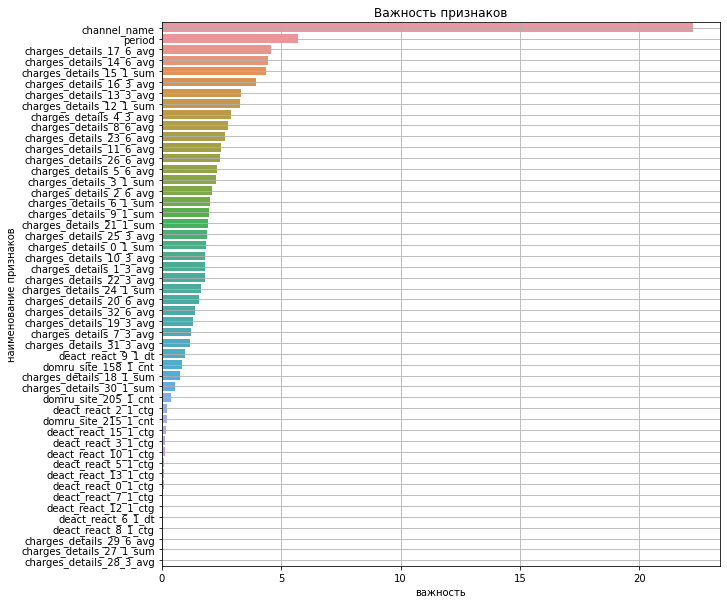

In [20]:
data_temp = data_load(num_list)
data_info(data_temp)
features_impotance = feature_impotant_selection(data_temp)

In [21]:
# данные о важности признаков
features_impotance.head(10)

,feature_name,importance
1,channel_name,22.2558
0,period,5.7236
19,charges_details_17_6_avg,4.5791
16,charges_details_14_6_avg,4.4298
17,charges_details_15_1_sum,4.3523
18,charges_details_16_3_avg,3.9646
15,charges_details_13_3_avg,3.3092
14,charges_details_12_1_sum,3.2827
6,charges_details_4_3_avg,2.9143
10,charges_details_8_6_avg,2.7790


В ходе данного пункта исследования были отобраны 239 признаков (не считая, `channel_name` и `period`) которые выдавали наилучшие результаты при обучении модели и оценке на валидации. Наименования этих признаков сохранено в `csv-файл`.

## Построение модели

### Загрузка признаков

Загружаем отобранные признаки.

In [122]:
# загрузим отобранные методом проб признаки для использования в модели
file_name = 'top_239_features'
file_path = folder_path +'/'+ file_name + '.csv'

In [123]:
features = pd.read_csv(file_path)
features.head()

,Unnamed: 0,fearure_name,type
0,0,tariff_plans_4_1_num,numeric
1,1,tariff_plans_5_1_num,numeric
2,2,tariff_plans_2_1_num,numeric
3,3,tariff_plans_6_1_num,numeric
4,4,tariff_plans_7_1_num,numeric


In [124]:
#списки числовых и категориальных признаков
numeric_features = features[features.type == 'numeric']['fearure_name'].to_list()
cat_features = features[features.type.str.contains('categorical')]['fearure_name'].to_list()
print(f'Числовые признаки - {len(numeric_features)}, категориальные - {len(cat_features)}')

Числовые признаки - 169, категориальные - 70


In [125]:
#загружаем датасет для выбранных признаков + признаки 'channel_name', 'period'
gen_list = numeric_features + cat_features + ['channel_name', 'period', 'target']

file_name = 'dataset_train'
file_path = folder_path +'/'+ file_name + '.parquet'
data = pd.read_parquet(file_path,
                       engine='auto',
                       columns=gen_list)

### EDA

Проанализируем признаки, которые мы отобрали на финальную модель

In [126]:
data_info(data)



Данные из выборки



,tariff_plans_4_1_num,tariff_plans_5_1_num,tariff_plans_2_1_num,tariff_plans_6_1_num,tariff_plans_7_1_num,tariff_plans_3_1_num,tariff_plans_8_1_num,tariff_plans_20_1_ctg,tariff_plans_9_1_num,tariff_plans_21_1_max,campaigns_2_6_cnt,campaigns_107_1_sum,campaigns_250_1_sum,campaigns_401_3_part,campaigns_400_1d6_part,campaigns_1_3_cnt,campaigns_404_6_part,campaigns_403_3d6_part,campaigns_276_1_sum,campaigns_0_1_cnt,info_house_6_0_num,basic_info_0_0_avg,area_0_0_num,basic_info_1_0_max,info_house_5_0_num,balance_details_0_1_num,basic_info_2_0_min,charges_details_16_3_avg,charges_details_17_6_avg,arpu_2_6_avg,charges_details_15_1_sum,charges_details_12_1_sum,materials_details_2_1_cnt,charges_details_14_6_avg,charges_details_11_6_avg,arpu_0_1_sum,autopay_6_0_dt,autopay_4_0_dt,charges_details_9_1_sum,charges_details_21_1_sum,charges_details_26_6_avg,charges_details_20_6_avg,charges_details_13_3_avg,materials_details_17_1_cnt,charges_details_10_3_avg,arpu_1_3_avg,charges_details_3_1_sum,charges_details_2_6_avg,charges_details_8_6_avg,charges_details_23_6_avg,charges_details_22_3_avg,charges_details_5_6_avg,charges_details_19_3_avg,charges_details_25_3_avg,charges_details_6_1_sum,charges_details_1_3_avg,charges_details_0_1_sum,charges_details_24_1_sum,charges_details_7_3_avg,charges_details_32_6_avg,charges_details_4_3_avg,charges_details_18_1_sum,charges_details_30_1_sum,charges_details_31_3_avg,materials_details_25_1_cnt,materials_details_24_1_cnt,charges_details_29_6_avg,charges_details_28_3_avg,charges_details_27_1_sum,markers_945_1_cnt,markers_933_1_cnt,markers_706_1_cnt,markers_904_1_cnt,markers_925_1_cnt,markers_912_1_cnt,markers_936_1_cnt,markers_937_1_cnt,markers_60_1_cnt,markers_938_1_cnt,markers_905_1_cnt,markers_655_1_cnt,markers_943_1_cnt,markers_808_1_cnt,markers_622_1_cnt,markers_476_1_cnt,markers_310_1_cnt,markers_104_1_cnt,markers_772_1_cnt,markers_701_1_cnt,markers_232_1_cnt,markers_807_1_cnt,markers_238_1_cnt,markers_542_1_cnt,markers_146_1_cnt,markers_438_1_cnt,markers_753_1_cnt,markers_149_1_cnt,markers_184_1_cnt,markers_837_1_cnt,markers_4_1_cnt,markers_103_1_cnt,markers_348_1_cnt,markers_346_1_cnt,markers_537_1_cnt,markers_349_1_cnt,markers_944_1_cnt,markers_896_1_cnt,markers_306_1_cnt,markers_387_1_cnt,markers_293_1_cnt,markers_324_1_cnt,markers_940_1_cnt,markers_806_1_cnt,markers_333_1_cnt,markers_535_1_cnt,markers_533_1_cnt,markers_434_1_cnt,markers_534_1_cnt,markers_61_1_cnt,spas_symptoms_agr_105_12_std,spas_symptoms_agr_106_12_sum,spas_symptoms_agr_104_12_avg,spas_symptoms_agr_115_6_sum,spas_symptoms_agr_114_6_std,spas_symptoms_agr_113_6_avg,spas_symptoms_ott_36_1_cnt,spas_symptoms_ott_118_1_cnt,spas_symptoms_ott_104_1_cnt,spas_symptoms_ott_73_1_cnt,spas_symptoms_ott_105_1_cnt,spas_symptoms_ott_58_1_cnt,spas_symptoms_int_93_1_cnt,spas_symptoms_int_92_1_cnt,spas_symptoms_ott_9_1_cnt,spas_symptoms_ott_42_1_cnt,spas_symptoms_ott_114_1_cnt,spas_symptoms_agr_110_3_avg,spas_symptoms_ott_51_1_cnt,spas_symptoms_agr_1_1_sum,spas_symptoms_agr_5_6_avg,spas_symptoms_ott_31_1_cnt,spas_symptoms_ott_63_1_cnt,spas_symptoms_ott_119_1_cnt,spas_symptoms_agr_16_3_sum,spas_symptoms_agr_147_3_std,spas_symptoms_ott_98_1_cnt,spas_symptoms_ott_84_1_cnt,spas_symptoms_ott_45_1_cnt,spas_symptoms_ott_16_1_cnt,spas_symptoms_ott_108_1_cnt,spas_symptoms_agr_149_6_avg,spas_symptoms_ott_75_1_cnt,spas_symptoms_agr_150_6_std,spas_symptoms_agr_286_12_sum,spas_symptoms_ott_48_1_cnt,spas_symptoms_ott_15_1_cnt,spas_symptoms_agr_163_6_sum,spas_symptoms_ott_97_1_cnt,spas_symptoms_agr_161_6_avg,spas_symptoms_ott_19_1_cnt,spas_symptoms_agr_160_3_sum,spas_symptoms_ott_69_1_cnt,spas_symptoms_int_130_1_cnt,spas_symptoms_ott_83_1_cnt,spas_symptoms_ott_110_1_cnt,spas_symptoms_ott_92_1_cnt,spas_symptoms_ott_13_1_cnt,spas_symptoms_agr_107_1_avg,spas_symptoms_agr_227_1_avg,tariff_plans_18_1_ctg,communication_availability_30_1_flg,tariff_plans_19_src_id,communication_availability_17_1_flg,info_house_10_0_ctg,cities_2_0_ctg,communication_availability_42_1_ctg,com

,tariff_plans_4_1_num,tariff_plans_5_1_num,tariff_plans_2_1_num,tariff_plans_6_1_num,tariff_plans_7_1_num,tariff_plans_3_1_num,tariff_plans_8_1_num,tariff_plans_20_1_ctg,tariff_plans_9_1_num,tariff_plans_21_1_max,campaigns_2_6_cnt,campaigns_107_1_sum,campaigns_250_1_sum,campaigns_401_3_part,campaigns_400_1d6_part,campaigns_1_3_cnt,campaigns_404_6_part,campaigns_403_3d6_part,campaigns_276_1_sum,campaigns_0_1_cnt,info_house_6_0_num,basic_info_0_0_avg,area_0_0_num,basic_info_1_0_max,info_house_5_0_num,balance_details_0_1_num,basic_info_2_0_min,charges_details_16_3_avg,charges_details_17_6_avg,arpu_2_6_avg,charges_details_15_1_sum,charges_details_12_1_sum,materials_details_2_1_cnt,charges_details_14_6_avg,charges_details_11_6_avg,arpu_0_1_sum,autopay_6_0_dt,autopay_4_0_dt,charges_details_9_1_sum,charges_details_21_1_sum,charges_details_26_6_avg,charges_details_20_6_avg,charges_details_13_3_avg,materials_details_17_1_cnt,charges_details_10_3_avg,arpu_1_3_avg,charges_details_3_1_sum,charges_details_2_6_avg,charges_details_8_6_avg,charges_details_23_6_avg,charges_details_22_3_avg,charges_details_5_6_avg,charges_details_19_3_avg,charges_details_25_3_avg,charges_details_6_1_sum,charges_details_1_3_avg,charges_details_0_1_sum,charges_details_24_1_sum,charges_details_7_3_avg,charges_details_32_6_avg,charges_details_4_3_avg,charges_details_18_1_sum,charges_details_30_1_sum,charges_details_31_3_avg,materials_details_25_1_cnt,materials_details_24_1_cnt,charges_details_29_6_avg,charges_details_28_3_avg,charges_details_27_1_sum,markers_945_1_cnt,markers_933_1_cnt,markers_706_1_cnt,markers_904_1_cnt,markers_925_1_cnt,markers_912_1_cnt,markers_936_1_cnt,markers_937_1_cnt,markers_60_1_cnt,markers_938_1_cnt,markers_905_1_cnt,markers_655_1_cnt,markers_943_1_cnt,markers_808_1_cnt,markers_622_1_cnt,markers_476_1_cnt,markers_310_1_cnt,markers_104_1_cnt,markers_772_1_cnt,markers_701_1_cnt,markers_232_1_cnt,markers_807_1_cnt,markers_238_1_cnt,markers_542_1_cnt,markers_146_1_cnt,markers_438_1_cnt,markers_753_1_cnt,markers_149_1_cnt,markers_184_1_cnt,markers_837_1_cnt,markers_4_1_cnt,markers_103_1_cnt,markers_348_1_cnt,markers_346_1_cnt,markers_537_1_cnt,markers_349_1_cnt,markers_944_1_cnt,markers_896_1_cnt,markers_306_1_cnt,markers_387_1_cnt,markers_293_1_cnt,markers_324_1_cnt,markers_940_1_cnt,markers_806_1_cnt,markers_333_1_cnt,markers_535_1_cnt,markers_533_1_cnt,markers_434_1_cnt,markers_534_1_cnt,markers_61_1_cnt,spas_symptoms_agr_105_12_std,spas_symptoms_agr_106_12_sum,spas_symptoms_agr_104_12_avg,spas_symptoms_agr_115_6_sum,spas_symptoms_agr_114_6_std,spas_symptoms_agr_113_6_avg,spas_symptoms_ott_36_1_cnt,spas_symptoms_ott_118_1_cnt,spas_symptoms_ott_104_1_cnt,spas_symptoms_ott_73_1_cnt,spas_symptoms_ott_105_1_cnt,spas_symptoms_ott_58_1_cnt,spas_symptoms_int_93_1_cnt,spas_symptoms_int_92_1_cnt,spas_symptoms_ott_9_1_cnt,spas_symptoms_ott_42_1_cnt,spas_symptoms_ott_114_1_cnt,spas_symptoms_agr_110_3_avg,spas_symptoms_ott_51_1_cnt,spas_symptoms_agr_1_1_sum,spas_symptoms_agr_5_6_avg,spas_symptoms_ott_31_1_cnt,spas_symptoms_ott_63_1_cnt,spas_symptoms_ott_119_1_cnt,spas_symptoms_agr_16_3_sum,spas_symptoms_agr_147_3_std,spas_symptoms_ott_98_1_cnt,spas_symptoms_ott_84_1_cnt,spas_symptoms_ott_45_1_cnt,spas_symptoms_ott_16_1_cnt,spas_symptoms_ott_108_1_cnt,spas_symptoms_agr_149_6_avg,spas_symptoms_ott_75_1_cnt,spas_symptoms_agr_150_6_std,spas_symptoms_agr_286_12_sum,spas_symptoms_ott_48_1_cnt,spas_symptoms_ott_15_1_cnt,spas_symptoms_agr_163_6_sum,spas_symptoms_ott_97_1_cnt,spas_symptoms_agr_161_6_avg,spas_symptoms_ott_19_1_cnt,spas_symptoms_agr_160_3_sum,spas_symptoms_ott_69_1_cnt,spas_symptoms_int_130_1_cnt,spas_symptoms_ott_83_1_cnt,spas_symptoms_ott_110_1_cnt,spas_symptoms_ott_92_1_cnt,spas_symptoms_ott_13_1_cnt,spas_symptoms_agr_107_1_avg,spas_symptoms_agr_227_1_avg,tariff_plans_18_1_ctg,communication_availability_30_1_flg,tariff_plans_19_src_id,communication_availability_17_1_flg,info_house_10_0_ctg,cities_2_0_ctg,communication_availability_42_1_ctg,com



Количество признаков: 242, Количество наблюдений: 702086


Информация о данных



,Признак,Тип данных,Уникальных значений,%Пропусков
0,tariff_plans_4_1_num,float64,505,0.679831
1,tariff_plans_5_1_num,float64,376,0.679831
2,tariff_plans_2_1_num,float64,278,53.379358
3,tariff_plans_6_1_num,float64,148,74.487171
4,tariff_plans_7_1_num,float64,116,74.487171
5,tariff_plans_3_1_num,float64,183,53.379358
6,tariff_plans_8_1_num,float64,122,96.050484
7,tariff_plans_20_1_ctg,float64,37,0.679831
8,tariff_plans_9_1_num,float64,78,96.050484
9,tariff_plans_21_1_max,float64,37,0.679831




Количество полных дубликатов в данных: 13


Описательная статистика 


,count,mean,std,min,25%,50%,75%,max
tariff_plans_4_1_num,697313.0000,0.0087,1.0055,-2.8672,-0.6590,0.0236,0.6469,24.8656
tariff_plans_5_1_num,697313.0000,-0.0036,1.0068,-3.8400,-0.6705,-0.0064,0.4766,24.3235
tariff_plans_2_1_num,327317.0000,0.0031,1.0095,-4.3212,-0.4236,-0.3073,0.3326,31.9786
tariff_plans_6_1_num,179122.0000,-0.0333,0.9574,-4.8484,-0.6423,-0.0739,0.6081,6.9740
tariff_plans_7_1_num,179122.0000,-0.0086,0.9667,-4.4056,-0.4464,-0.0160,0.3282,5.3203
...,...,...,...,...,...,...,...,...
autopay_3_1_flg,702086.0000,-0.7740,0.5604,-1.0000,-1.0000,-1.0000,-1.0000,1.0000
communication_availability_57_1_ctg,702086.0000,0.2883,1.0774,-1.0000,0.0000,0.0000,0.0000,5.0000
communication_availability_45_1_flg,702086.0000,0.5752,0.6048,-1.0000,0.0000,1.0000,1.0000,1.0000
period,702086.0000,202208.5130,3.0614,202201.0000,202207.0000,202210.0000,202210.0000,202212.0000


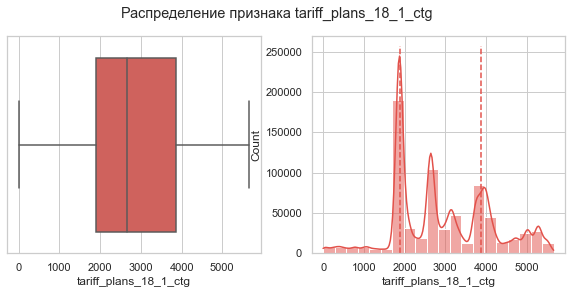

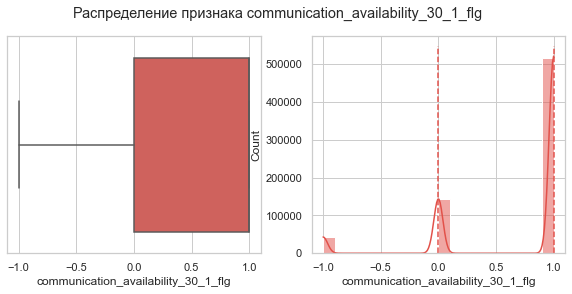

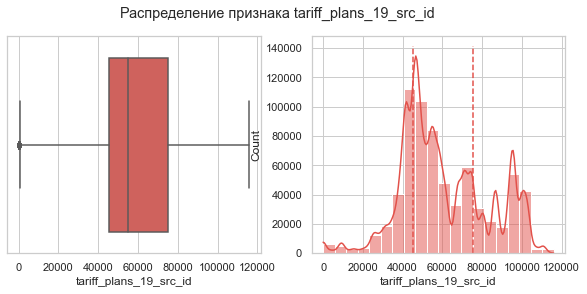

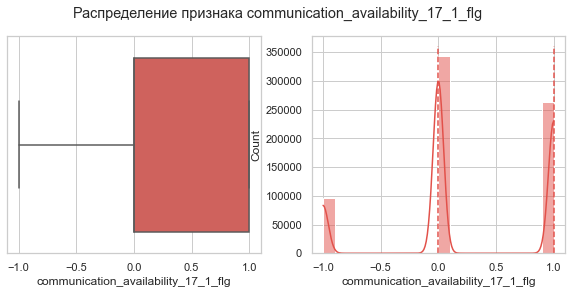

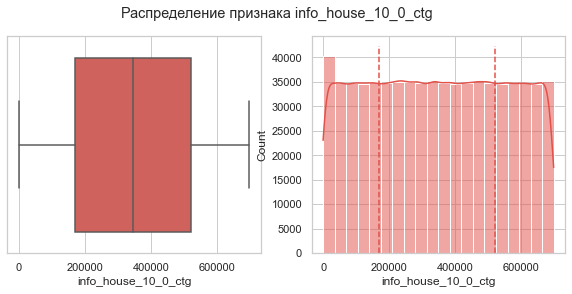

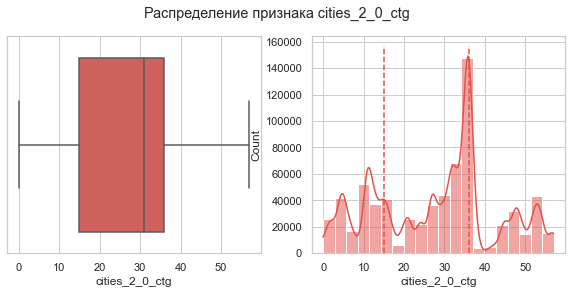

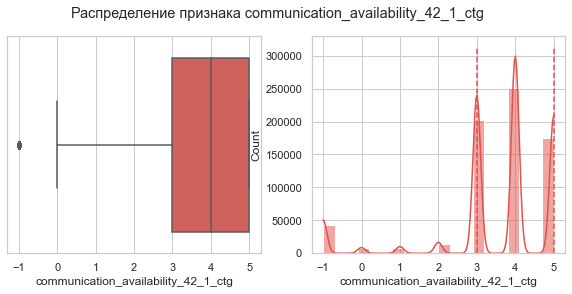

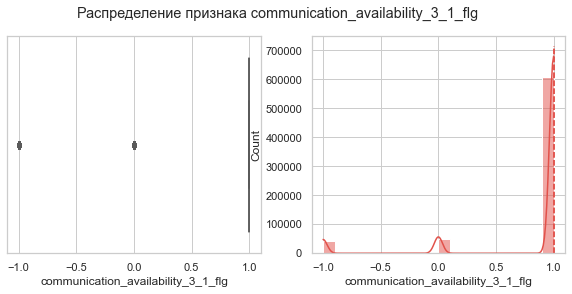

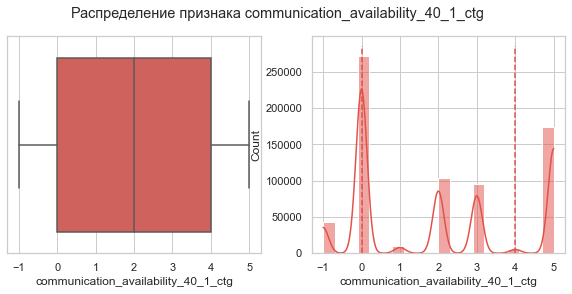

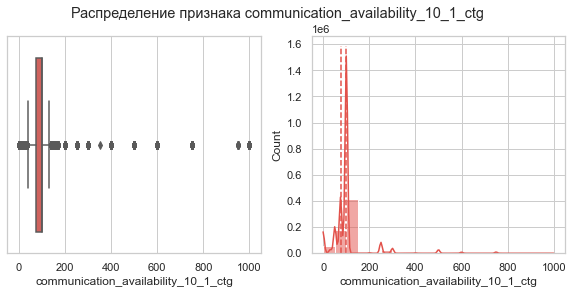

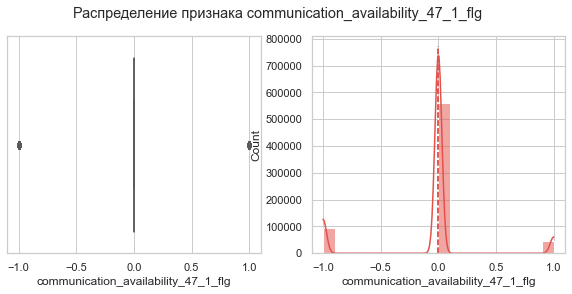

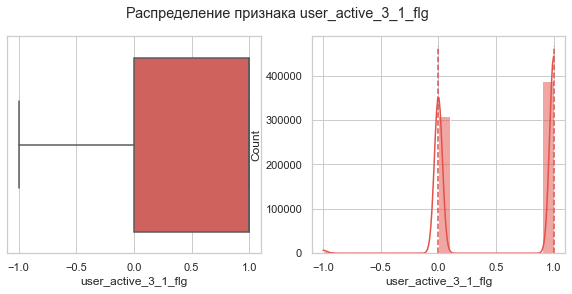

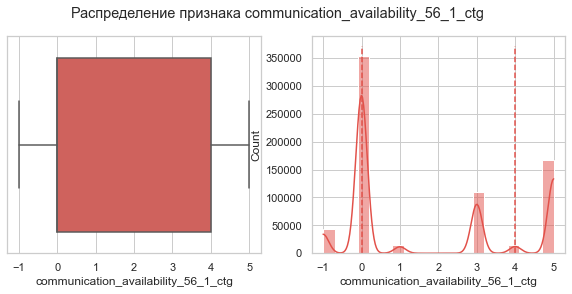

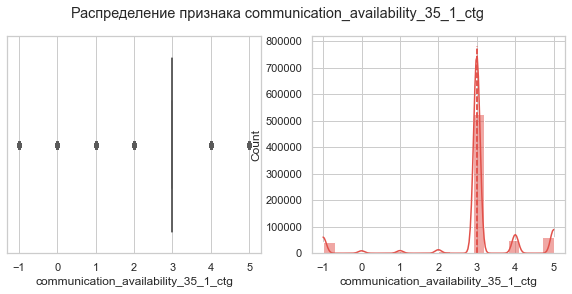

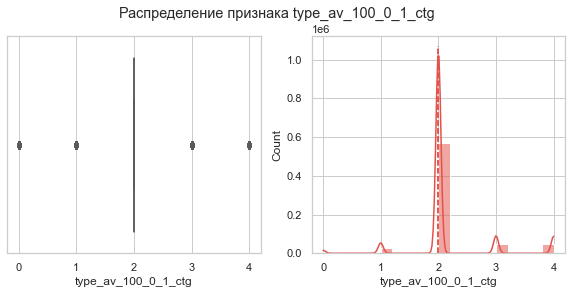

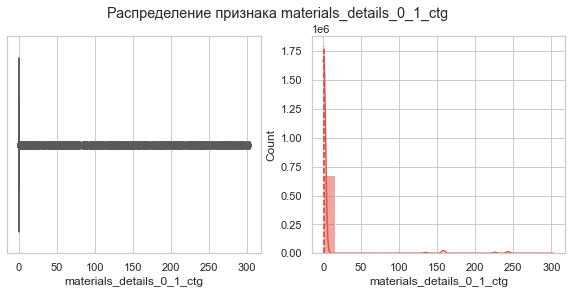

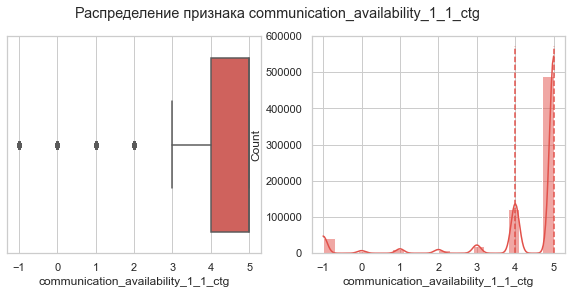

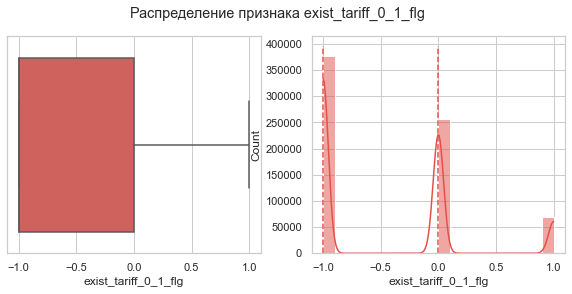

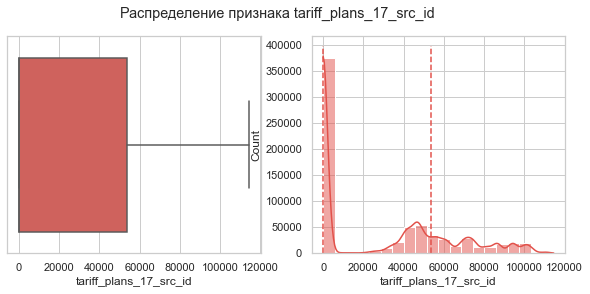

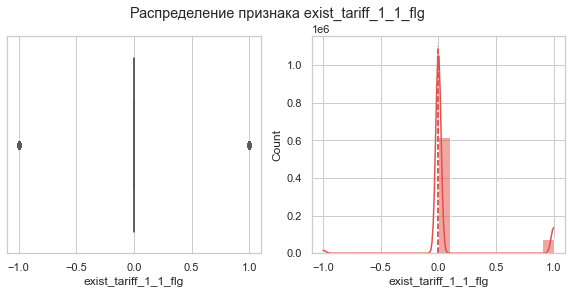

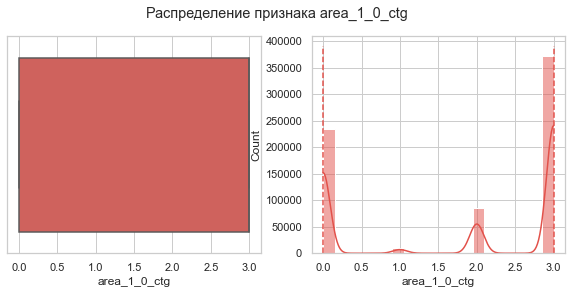

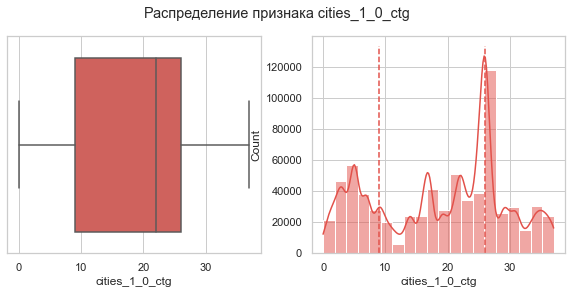

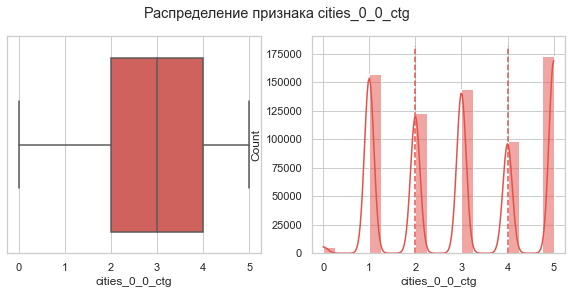

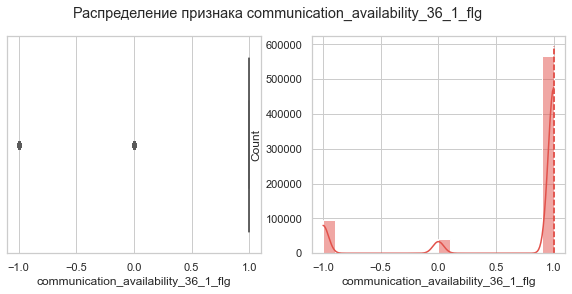

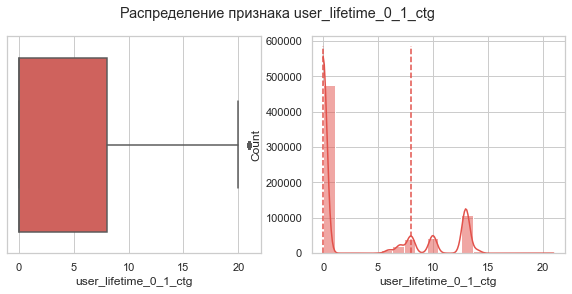

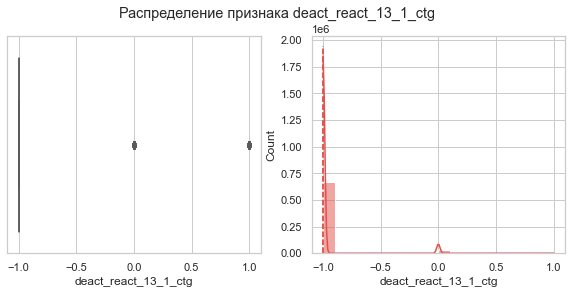

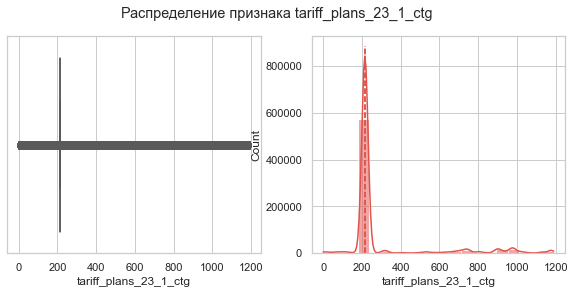

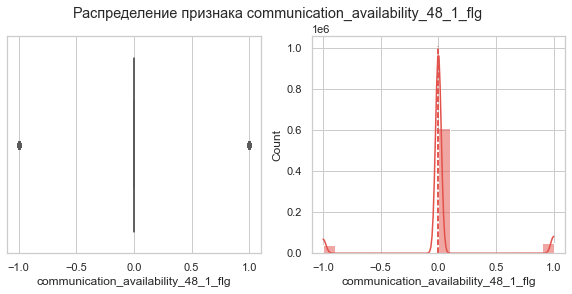

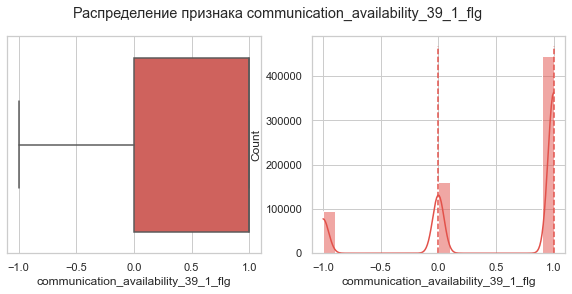

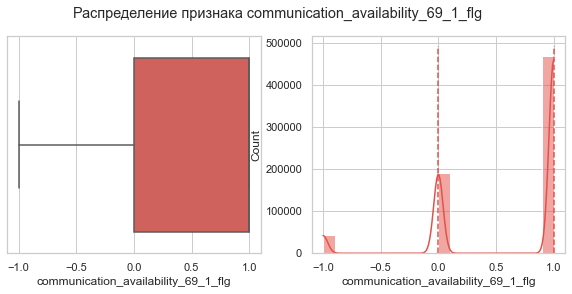

In [21]:
# выведем распределение числовых признаков
# (ограничимcя 30 шт)
for item in cat_features[:30]:
    box_hist_plot(data, item)

In [139]:
def hist_target_plot(data):
    # Разделение данных на подгруппы по значениям столбца 'target'
    grouped = data.groupby('target')

    # Построение гистограмм для подгрупп
    fig, ax = plt.subplots(nrows=57, ncols=3, figsize=(12, 150))
    plt.suptitle('Гистограммы числовых признаков в зависимости от значения целевого признака', y = 1.005)

    for i, col  in enumerate(numeric_features):
        for name, group in grouped[col]:
            group.hist(ax=ax[i//3, i%3], 
                       bins=30, 
                       cm,
                       alpha=0.6, density=True, 
                       label=f'Target {name}')
        ax[i//3, i%3].set_title(col)
        ax[i//3, i%3].legend()
        ax[i//3, i%3].set_ylabel('Density')
        ax[i//3, i%3].set_xlabel(f'Признак "{col}"')


    plt.tight_layout()

ValueError: Using a string of single character colors as a color sequence is not supported. The colors can be passed as an explicit list instead.

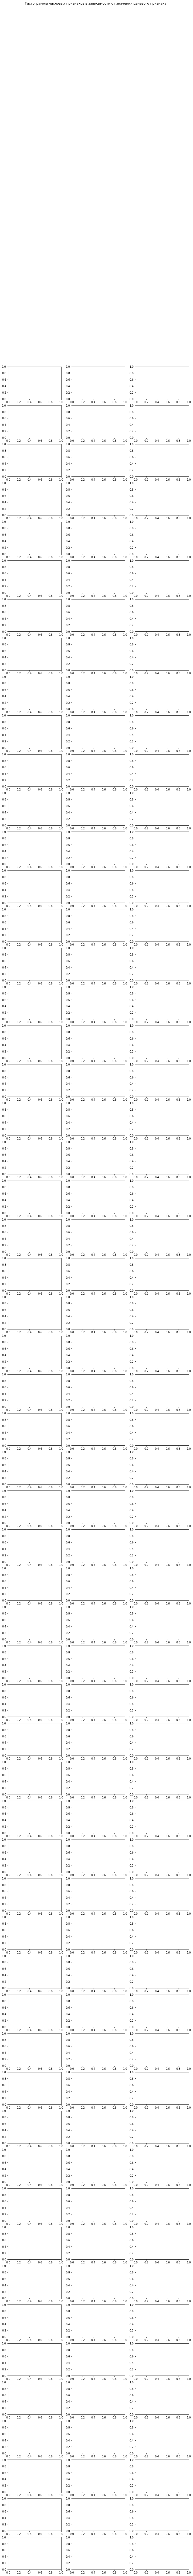

In [140]:
hist_target_plot(data)

**Выводы:**
* имеются полные дубликаты - удалим их
* имеются пропуски - их судьбу будем решать для каждой модели индивидуально
* имеется 3 признака, содержащие 1 значение - их удалим
* признак `channel_name` - содержит целочисленные значеня и является категориальным - преобразуем его.
* имеется ряд признаков, которые заказчиков объявлены, как численные, по факту являются категориальными. В идеале для `CatBoost` определить их категориальными. 

In [21]:
# удаляем признаки с единственным значением
data = data.drop_duplicates()
list_to_del = ['charges_details_29_6_avg',
                'charges_details_28_3_avg',
                'charges_details_27_1_sum']
data = data.drop(list_to_del, axis=1)

In [22]:
data['channel_name'] = data['channel_name'].astype('int8')

In [23]:
y = data['target']
X = data.drop('target', axis = 1)

### Обучение модели

В ходе исследования на различных наборах признаков и методах их обработки были обучены следующие модели:

1. `LogisticRegression` 
2. `LigthGBMClassifier`
3. `CatBoostClassifier`
4. 

In [24]:
# список для хранения результатов
list_best_params = []

#### `LogisticRegression`

In [30]:
# создадим модель
model_lr = LogisticRegression(random_state=RS, max_iter=500, class_weight='balanced')

In [31]:
params_lr = {'model__C': [0.01]} #np.arange(0.01, 10, 0.1)

In [32]:
# заполним пропуски флаговым значением -5
# масштабирование признаков проведем с помощью 
pipe_lr = Pipeline(steps=[
            ('preprocessor', SimpleImputer(fill_value=-5)),
            ('scaler', StandardScaler()),
            ('model', model_lr)])

In [33]:
# подбор гиперпараметров
searcher_lr = GridSearchCV(pipe_lr,
                        param_grid=params_lr,
                        scoring='roc_auc',
                        cv=CV,
                        n_jobs=-1,
                        verbose=10,
                        refit=True)

In [34]:
search_lr = searcher_lr.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [35]:
list_best_params.append({'model_type': 'LogReg+SI+SS',
                         'model': search_lr.best_estimator_,
                         'model_params': search_lr.best_params_,
                         'ROC_AUC': search_lr.best_score_})

In [36]:
print_result(list_best_params, 10)

,model_type,model,model_params,ROC_AUC
0,LogReg+SI+SS,"(SimpleImputer(fill_value=-5), StandardScaler(), LogisticRegression(C=0.01, class_weight='balanced', max_iter=500,\n random_state=5962))",{'model__C': 0.01},0.7152


#### `LigthGBMClassifier`

In [37]:
# задаем модель
model_lgbm = LGBMClassifier(random_state=RS, 
                            class_weight='balanced')

In [38]:
# гиперпараметры для поиска
params_lgbm = {}

In [39]:
pipe_lgbm = Pipeline(steps=[
            #('scaler', MinMaxScaler((-5, 5))),
            ('preprocessor', SimpleImputer(fill_value=-10)),
            ('scaler', RobustScaler(quantile_range=(5, 95))),
            ('model', model_lgbm)])

In [40]:
# подбор гиперпараметров
searcher_lgbm = GridSearchCV(pipe_lgbm,
                        param_grid=params_lgbm,
                        scoring='roc_auc',
                        cv=3,
                        n_jobs=-1,
                        verbose=10)

In [41]:
search_lgbm = searcher_lgbm.fit(X, y)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [42]:
list_best_params.append({'model_type': '_lgbm+SI+RS',
                         'model': search_lgbm.best_estimator_,
                         'model_params': search_lgbm.best_params_,
                         'ROC_AUC': search_lgbm.best_score_})

In [43]:
print_result(list_best_params, 20)

,model_type,model,model_params,ROC_AUC
0,LogReg+SI+SS,"(SimpleImputer(fill_value=-5), StandardScaler(), LogisticRegression(C=0.01, class_weight='balanced', max_iter=500,\n random_state=5962))",{'model__C': 0.01},0.7152
1,_lgbm+SI+RS,"(SimpleImputer(fill_value=-10), RobustScaler(quantile_range=(5, 95)), LGBMClassifier(class_weight='balanced', random_state=5962))",{},0.7482


Данная модель показала следующие результаты на тестовой выборке LeaderBoard:
* `Public` - 0.6327
* `Private` - 0.6518

#### `CatBoostClassifier`

Для данной модели будем использовать методы родной библиотеки.
Как показало исследование, наилучшие результаты анная модель показала, без предварительной человеческой обрботки данных.

In [58]:
# Выделим валидационную выборку
X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=RS, stratify=y)

In [66]:
# итоговые подобранные параметры
params = {'random_seed' : RS,
          'cat_features' : cat_features,
          'auto_class_weights' : 'Balanced',
          'custom_metric' : 'AUC',
          'eval_metric' : 'AUC',
          'learning_rate' : 0.038,
          'depth' : 4,
          'iterations' : 800,
          'verbose': 25,
          'thread_count': -1
          #'task_type': 'GPU'
         }

In [67]:
# параметры обучения
fit_params = { #'plot' : True,
              'eval_set' : (X_valid, y_valid),
              'early_stopping_rounds' : 150
             }

In [68]:
model_cb, roc_auc_cb, fi_cb = fitting(X_train, y_train, params, fit_params)

0:	test: 0.6989857	best: 0.6989857 (0)	total: 1.54s	remaining: 20m 29s
25:	test: 0.7532790	best: 0.7533743 (24)	total: 35s	remaining: 17m 22s
50:	test: 0.7592950	best: 0.7592950 (50)	total: 1m 8s	remaining: 16m 41s
75:	test: 0.7726549	best: 0.7726549 (75)	total: 2m 10s	remaining: 20m 43s
100:	test: 0.7760487	best: 0.7760638 (99)	total: 3m 7s	remaining: 21m 35s
125:	test: 0.7783212	best: 0.7783212 (125)	total: 3m 51s	remaining: 20m 40s
150:	test: 0.7797141	best: 0.7797384 (149)	total: 4m 31s	remaining: 19m 26s
175:	test: 0.7806392	best: 0.7806392 (175)	total: 5m 10s	remaining: 18m 21s
200:	test: 0.7818956	best: 0.7818956 (200)	total: 5m 46s	remaining: 17m 12s
225:	test: 0.7827560	best: 0.7827560 (225)	total: 6m 24s	remaining: 16m 17s
250:	test: 0.7833670	best: 0.7833716 (249)	total: 7m 3s	remaining: 15m 27s
275:	test: 0.7839020	best: 0.7839020 (275)	total: 7m 38s	remaining: 14m 30s
300:	test: 0.7845109	best: 0.7845109 (300)	total: 8m 18s	remaining: 13m 45s
325:	test: 0.7848462	best: 0.7

In [69]:
print(f'ROC_AUC на валидационной выборке: {roc_auc_cb}')

ROC_AUC на валидационной выборке: 0.7890240413548887


Данная модель показала следующие результаты на тестовой выборке LeaderBoard:
* `Public` - 0.6536
* `Private` - 0.6775

Сохраняем обученную модель

In [73]:
joblib.dump(model_cb, "cbc_final.pkl")

['cbc_final.pkl']

#### `XGB`

In [75]:
from xgboost import XGBClassifier

In [76]:
# задаем модель
model_xgb = XGBClassifier(random_state=RS,
                          scale_pos_weight=10)

In [77]:
# собираем пайплайн
pipe_xgb = Pipeline(steps=[
    ('preprocessor', SimpleImputer(fill_value=-10)),
    ('scaler', RobustScaler(quantile_range=(1, 95))),
    ('model', model_xgb)
    ])

In [78]:
# гиперпараметры для подбора
params_xgb={'model__booster':  ['dart'], #['gbtree', 'gblinear', 'dart']
        #    'model__eta': [0.04, 0.05, 0.07]
           } 

In [79]:
searcher_xgb = GridSearchCV(pipe_xgb,
                        param_grid=params_xgb,
                        scoring='roc_auc',
                        cv=CV,
                        n_jobs=-1,
                        verbose=10) 

In [80]:
search_xgb = searcher_xgb.fit(X, y) 

Fitting 3 folds for each of 1 candidates, totalling 3 fits


In [81]:
list_best_params.append({'model_name': '_xgb',
                         'model': search_xgb.best_estimator_[-1],
                         'model_params': search_xgb.best_params_,
                         'ROC_AUC': search_xgb.best_score_})

In [82]:
print_result(list_best_params, 10)

,model_type,model,model_params,ROC_AUC,model_name
0,LogReg+SI+SS,"(SimpleImputer(fill_value=-5), StandardScaler(), LogisticRegression(C=0.01, class_weight='balanced', max_iter=500,\n random_state=5962))",{'model__C': 0.01},0.7152,NaN
1,_lgbm+SI+RS,"(SimpleImputer(fill_value=-10), RobustScaler(quantile_range=(5, 95)), LGBMClassifier(class_weight='balanced', random_state=5962))",{},0.7482,NaN
2,NaN,"XGBClassifier(base_score=None, booster='dart', callbacks=None,\n colsample_bylevel=None, colsample_bynode=None,\n colsample_bytree=None, early_stopping_rounds=None,\n ...",{'model__booster': 'dart'},0.7245,_xgb


Данная модель показала следующие результаты на тестовой выборке LeaderBoard:
* `Public` - 0.6075
* `Private` - 0.6318

В итоге лучшей моделью оказался `CatBoostClassifier`

## Тестирование

In [93]:
# выбираем модель для тестирования
model_test = model_cb

In [94]:
model_test

Загружаем тестовую выборку

In [85]:
X_test = pd.read_parquet('features_oot.parquet',
                         columns = X.columns)

Получаем предсказания на тестовой выборке

In [95]:
predictions = model_test.predict_proba(X_test)
predictions

array([[0.34805384, 0.65194616],
       [0.5781736 , 0.4218264 ],
       [0.36749044, 0.63250956],
       ...,
       [0.23959987, 0.76040013],
       [0.2297472 , 0.7702528 ],
       [0.79275074, 0.20724926]])

Загружаем образец тестовой выборки и вставляем наши предсказания

In [96]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,target
0,0,0.3435
1,1,0.5912
2,2,0.9131
3,3,0.5600
4,4,0.3528


In [97]:
sample_submission['target'] = predictions[:,1]
sample_submission.head()

,id,target
0,0,0.6519
1,1,0.4218
2,2,0.6325
3,3,0.4868
4,4,0.7364


In [98]:
sample_submission.to_csv('submission_final.csv', index = False)

Данная модель победила по результатам на тестовой выборке LeaderBoard:
* `Public` - 0.6536
* `Private` - 0.6775

## Анализ важности признаков

Посмотрим какие же фичи оказались наиболее важными у финальной модели

In [107]:
features_importances_cb = fi_cb.reset_index().head(30)

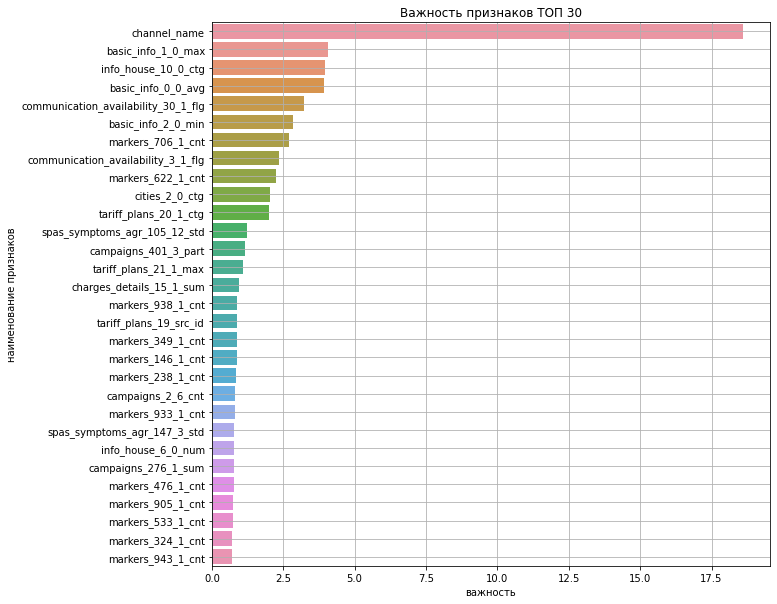

In [116]:
# построим график важности признаков
plt.figure(figsize=(10,10));
sns.barplot(x='importance', y='feature_names', data=features_importances_cb);
plt.grid(True);
plt.xlabel('важность')
plt.ylabel('наименование признаков')
plt.title('Важность признаков ТОП 30');

In [115]:
print(f'Количество фичей с нулевой важностью', fi_cb[fi_cb['importance'] == 0].shape[0])

Количество фичей с нулевой важностью 10


## Выводы

В ходе выполнения настоящего проекта был построен прототип модели машинного обучения для определения склонности (бинарной классификации) к покупке клиентом оборудования после коммуникации с ним в одном из каналов. 

Целевая метрика `ROC_AUC` - эта метрика оценивает способность модели разделять классы и предсказывать вероятности принадлежности объектов к тому или иному классу. В ходе работы необхоодимо было достичь максимального показатля данной метрика на тестовой выборке, в частнности на ее `Privite` части.

Требований по скорости обучения и предсказания заказчиком предъявлено не было.

Все запланированные этапы согласно Плану исследования были выполнены.

**Этап 1.  Загрузка и исследование данных**

Загружены данные, из предоставленных заказчиком файлов, содержащие информацию:
   * о наименовании самих признаков и их отношении к отпределенному типу;
   * данные обучающей выборки;
   * данные тестовой выборки.
   
В ходе исследования установлено, что данные содержат более 2700 признаков, которые являются анонимизированными. Поэтому отбор в соотвествии с человеческой логикой -  не подходящий для данной задачи вариант.

**Этап 2.  Подготовка данных**

В связи с большим количеством признаков, первым этапом подготовки данных стал отбор признаков для моделирования.

Для отбора признаков команда использовала оценку важности признаков моделями, которые планировалось применять:
* `CatBoost`
* `LGBM`

Далее проводился отбор наиболее важных признаков и их влияние на качество дефолтной модели. В результате такого исследования были отобраны 239 фичей, которые давали наилучший результат на модели.

Исследование уже отобранных признаков показало:
* имеются признаки, которые содержат только одно значение и это `0`. Данные признаки удалили из рассмотрения;
* имеются признаки, которые по характеру значений похожи на категориальные.
* построены распределения признаков, по которым также сложно судить о физической природе признаке...

**Этап 3.  Построение моделей и тестирование**

В ходе соревнования командой были исследованы следующие модели:

* Линейные - `LogiscitRegressor`
* Бустинги - `Catboost, LGBM, XGBoost`
* Метод близжайших соседей `KNeighborsClassifier`
* Стэккинг из выше озвученных моделей

На каждом этапе проводилось исследование на предмет 
* различных методов заполнения пропусков
* удаление выбросов
* масштабирование данных

На финальном этапе проводился подбор гиперпараметров для перспективных моделей.

Победила модель - `CatboostClassifier` с минимальной подготовкой данных для исследования.
При этом судя по важности признаков модели финалистки, есть ряд признаков с нулевым значением, а следовательно есть еще точки роста)))